
*******************************************************************************************
Que es la regresion Lineal: Es un método estadístico para modelar la relación entre variables, prediciendo una 
variable basada en otras. A través de una línea recta, representa la relación entre una variable independiente y una dependiente. 
Ayuda a entender y predecir tendencias y patrones en los datos de manera simple y efectiva.

*******************************************************************************************
Ejercicio Propuesto: Analizar el Dataset el cual contiene información técnica y de mercado de automóviles. 
El objetivo es predecir el precio del automóvil en función de sus atributos siguendo el siguiente modelo:



    1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
    2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
    3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
    4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
    5. Entrenar el modelo configurando los diferentes hiperparámetros
    6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
    7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
    8. Interpretar, analizar y documentar los resultados obtenidos
    9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/



In [126]:
'''
Codigo tomado del repositorio del Doc. Breyner Alexander Parra
'''

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

In [127]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Car details v3.csv')

In [128]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [129]:
# Descripción de los datos
Datos.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [130]:
# Checking Null values
Datos.isnull().sum()*100/Datos.shape[0]
# There are no NULL values in the dataset, hence it is clean.

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

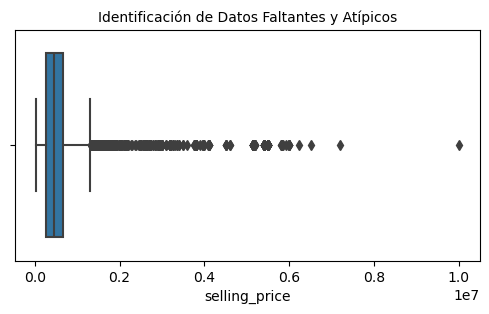

In [131]:

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['selling_price'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

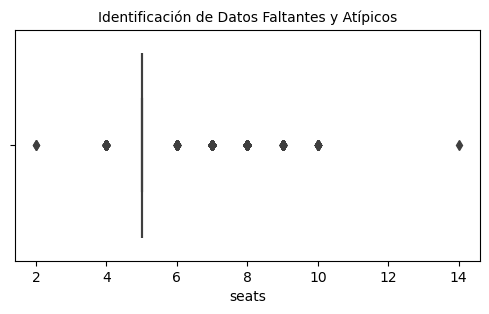

In [132]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['seats'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [133]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en nombre: ",Datos['name'].isin([0]).sum())
print("Cantidad de Registros con cero en Año: ",Datos['year'].isin([0]).sum())
print("Cantidad de Registros con cero en Precio de venta: ",Datos['selling_price'].isin([0]).sum())
print("Cantidad de Registros con cero en kilometros conducidos: ",Datos['km_driven'].isin([0]).sum())
print("Cantidad de Registros con cero en tipo de venta: ",Datos['seller_type'].isin([0]).sum())
print("Cantidad de Registros con cero en transimision: ",Datos['transmission'].isin([0]).sum())
print("Cantidad de Registros con cero en Dueño: ",Datos['owner'].isin([0]).sum())
print("Cantidad de Registros con cero en kilometraje: ",Datos['mileage'].isin([0]).sum())
print("Cantidad de Registros con cero en Motor: ",Datos['engine'].isin([0]).sum())
print("Cantidad de Registros con cero en Potencia Maxima: ",Datos['max_power'].isin([0]).sum())
print("Cantidad de Registros con cero en Fuerza: ",Datos['torque'].isin([0]).sum())
print("Cantidad de Registros con cero en asientos: ",Datos['seats'].isin([0]).sum())

Cantidad de Registros con cero en nombre:  0
Cantidad de Registros con cero en Año:  0
Cantidad de Registros con cero en Precio de venta:  0
Cantidad de Registros con cero en kilometros conducidos:  0
Cantidad de Registros con cero en tipo de venta:  0
Cantidad de Registros con cero en transimision:  0
Cantidad de Registros con cero en Dueño:  0
Cantidad de Registros con cero en kilometraje:  0
Cantidad de Registros con cero en Motor:  0
Cantidad de Registros con cero en Potencia Maxima:  0
Cantidad de Registros con cero en Fuerza:  0
Cantidad de Registros con cero en asientos:  0


In [134]:
#Conteo de Datos Atípicos

nivel_minimo=1.000000e+00
nivel_maximo=2.222222e+06
Total_Atipicos=((Datos['km_driven']<nivel_minimo)|(Datos['km_driven']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 1


In [135]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['km_driven']<nivel_maximo)&(Datos['km_driven']>nivel_minimo)]

In [136]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['km_driven']<nivel_minimo)|(Datos['km_driven']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [138]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8126 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8126 non-null   object 
 1   year           8126 non-null   int64  
 2   selling_price  8126 non-null   int64  
 3   km_driven      8126 non-null   int64  
 4   fuel           8126 non-null   object 
 5   seller_type    8126 non-null   object 
 6   transmission   8126 non-null   object 
 7   owner          8126 non-null   object 
 8   mileage        7905 non-null   object 
 9   engine         7905 non-null   object 
 10  max_power      7911 non-null   object 
 11  torque         7904 non-null   object 
 12  seats          7905 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 888.8+ KB


In [139]:
# Total de precio de venta

Datos['selling_price'].value_counts()

selling_price
300000     227
600000     213
350000     209
550000     203
450000     195
          ... 
308000       1
3900000      1
2850000      1
39000        1
746000       1
Name: count, Length: 676, dtype: int64

In [140]:
Datos[['selling_price']].head(40)

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
5,440000
6,96000
7,45000
8,350000
9,200000


In [141]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('transmission',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['transmission'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [142]:
print (X_train)

                                          name  year  selling_price  \
193            Hyundai Verna Transform SX VTVT  2010         320000   
7373               Maruti Swift VDI BSIV W ABS  2016         595000   
5382                    Maruti Swift Dzire VDI  2016         631000   
4056                    Hyundai Santro Xing XL  2007         200000   
1041                    Honda Mobilio S i DTEC  2016         450000   
...                                        ...   ...            ...   
4463            Mahindra Bolero Power Plus SLE  2017         650000   
1709  Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
1689                       Mahindra Marazzo M8  2019        1460000   
4103                         Chevrolet Beat LT  2010         150000   
253                Maruti Swift LXI Optional-O  2015         350000   

      km_driven    fuel seller_type         owner     mileage   engine  \
193      100000  Petrol  Individual   Third Owner   16.2 kmpl  1599 CC   

In [143]:
print (Y_train)

193        Manual
7373       Manual
5382       Manual
4056       Manual
1041       Manual
          ...    
4463       Manual
1709    Automatic
1689       Manual
4103       Manual
253        Manual
Name: transmission, Length: 6094, dtype: object


In [144]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [145]:
print (Y_test)

8102    Manual
1351    Manual
2334    Manual
2327    Manual
534     Manual
         ...  
3479    Manual
4524    Manual
1583    Manual
3924    Manual
1362    Manual
Name: transmission, Length: 2032, dtype: object


In [146]:
from sklearn.linear_model import LogisticRegression

modelo_regresion = LogisticRegression(solver="liblinear")

Text(0, 0.5, 'y_train')

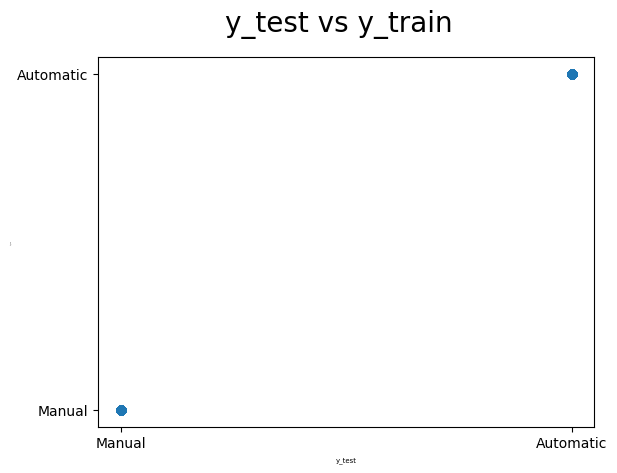

In [147]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,Y_test)
fig.suptitle('y_test vs y_train', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=5)                          # X-label
plt.ylabel('y_train', fontsize=1)                          # Y-label

Analizamos datos de autos, incluyendo nombre, año, precio, kilometraje, combustible, vendedor, transmisión, propietario, motor y asientos. Realizamos limpieza, exploración y modelado para entender cómo estas características afectan el precio, se hizo uso de una variable puesto que el codigo proporcionado no permitia validar varias variables a la vez, se realiza la grafica final mediante el codigo proporcionado y ajustada a la variable que permitio hacer el modelo.